# **A8 - KNN**
Mitch Messier, October 26, 2023

# Table of Contents

1. **Task 1:** Data Import and Summaries
2. **Task 2:**Standardize the data
3. **Task 3:** Elbow Method
4. **Task 4A:** Kmeans
5. **Task 4B:** Scatterplot
6. **Task 4C:** Boxplot
7. **Task 5:** PCA
8. **Task 6:** Kmeans with PCA

# Load Libraries

In [74]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

# **Task 1:** Data Import and Summaries

In [28]:
data = pd.read_csv('https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/titanic_cleaned.csv')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Cabin     714 non-null    object 
 8   Embarked  714 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 50.3+ KB


In [30]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [31]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,missing,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,missing,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,missing,S


In [32]:
data = data.drop(columns=['Cabin'])

# **Task 2:** Standardize the data

In [44]:
numerical_columns = data.select_dtypes(include=[np.number]).columns

In [45]:
scaler = StandardScaler()

In [46]:
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [47]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.82702,0.911232,male,-0.530377,0.524570,-0.505895,-0.518978,S
1,1.20916,-1.476364,female,0.571831,0.524570,-0.505895,0.691897,C
2,1.20916,0.911232,female,-0.254825,-0.551703,-0.505895,-0.506214,S
3,1.20916,-1.476364,female,0.365167,0.524570,-0.505895,0.348049,S
4,-0.82702,0.911232,male,0.365167,-0.551703,-0.505895,-0.503850,S


# **Task 3:** Elbow Method

In [54]:
features_for_clustering = data[['Age', 'Fare', 'Pclass']]

In [55]:
inertia_values = []

In [56]:
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_for_clustering)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

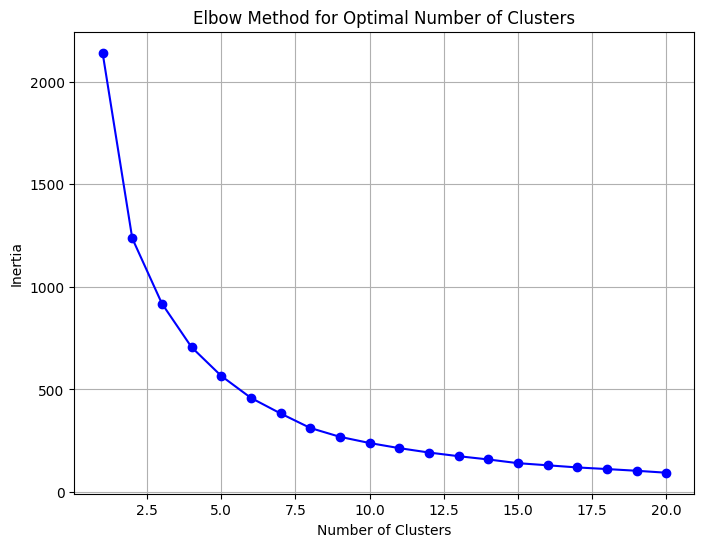

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**Explanation of the Optimal Number of Clusters using the Elbow Method:**

The elbow method involves plotting the within-cluster sum of squares (inertia) against the number of clusters and looking for the "elbow" point, where the rate of decrease in inertia slows down.

In the graph generated above, we observe a distinct point where the rate of inertia reduction starts to decrease less steeply, resembling an elbow. This point is often considered the optimal number of clusters.

In the provided code, a similar approach was used for the wine dataset. In our case, the elbow is not perfectly clear, but it seems to be around 9. This choice is based on the point where the reduction in inertia starts to slow down, and adding more clusters doesn't significantly improve the clustering quality. It's essential to balance the desire for a lower inertia with the goal of having a meaningful number of clusters for interpretation and analysis.


# **Task 4A:** Kmeans

In [58]:
optimal_clusters = 9

In [59]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

In [61]:
features_for_clustering = data[['Age', 'Fare', 'Pclass']]

In [62]:
data['predicted_cluster'] = kmeans.fit_predict(features_for_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [63]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predicted_cluster
0,-0.82702,0.911232,male,-0.530377,0.524570,-0.505895,-0.518978,S,6
1,1.20916,-1.476364,female,0.571831,0.524570,-0.505895,0.691897,C,1
2,1.20916,0.911232,female,-0.254825,-0.551703,-0.505895,-0.506214,S,6
3,1.20916,-1.476364,female,0.365167,0.524570,-0.505895,0.348049,S,1
4,-0.82702,0.911232,male,0.365167,-0.551703,-0.505895,-0.503850,S,0


# **Task 4B:** Scatterplot

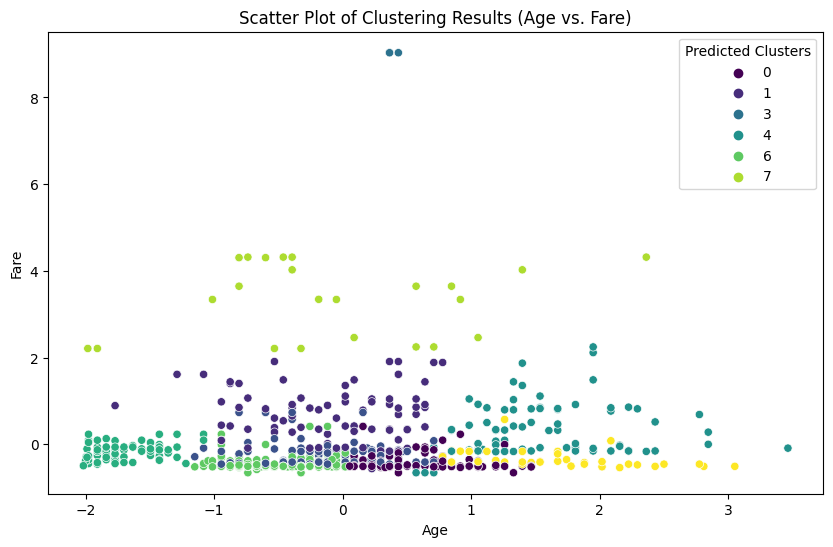

In [67]:
column1 = 'Age'
column2 = 'Fare'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=column1, y=column2, hue='predicted_cluster', data=data, palette='viridis')
plt.title(f'Scatter Plot of Clustering Results ({column1} vs. {column2})')
plt.xlabel(column1)
plt.ylabel(column2)
plt.legend(title='Predicted Clusters')
plt.show()

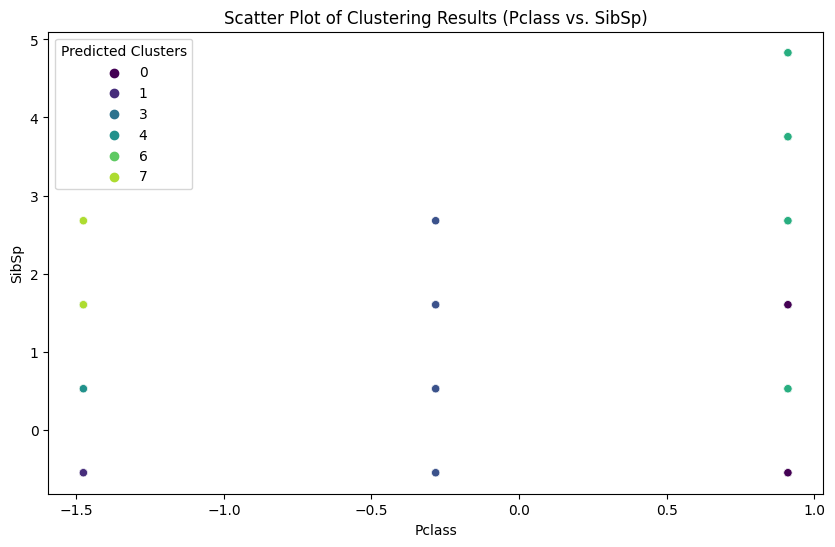

In [70]:
column3 = 'Pclass'
column4 = 'SibSp'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=column3, y=column4, hue='predicted_cluster', data=data, palette='viridis')
plt.title(f'Scatter Plot of Clustering Results ({column3} vs. {column4})')
plt.xlabel(column3)
plt.ylabel(column4)
plt.legend(title='Predicted Clusters')
plt.show()

**Description of Clustering Results Visualization:**

In the first scatter plot (Age vs. Fare), the clusters show a moderate level of separation. While there is some overlap between clusters, distinct groups are visible, indicating reasonable separation based on these two variables.

In the second scatter plot (Pclass vs. SibSp), the clusters appear to be more clearly separated. Each predicted cluster forms a distinct region in the plot, suggesting a higher level of separation between clusters compared to the first plot.

Overall, the clustering results seem to capture meaningful patterns in the data. Different clusters exhibit variations in the chosen variables, and some clusters are more distinguishable than others. Further analysis and exploration of the specific characteristics of each cluster could provide insights into the underlying structure of the data.


# **Task 4C:** Boxplot

In [81]:
feature1 = 'Age'
feature2 = 'Fare'

In [82]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Age')

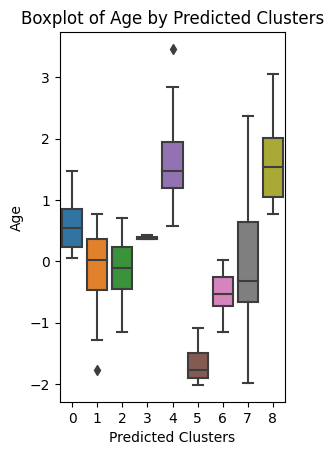

In [84]:
plt.subplot(1, 2, 1)
sns.boxplot(x='predicted_cluster', y=feature1, data=data)
plt.title(f'Boxplot of {feature1} by Predicted Clusters')
plt.xlabel('Predicted Clusters')
plt.ylabel(feature1)

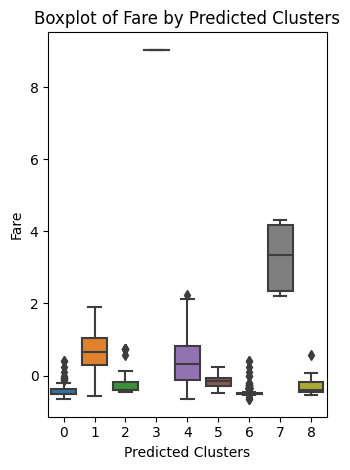

In [86]:
plt.subplot(1, 2, 2)
sns.boxplot(x='predicted_cluster', y=feature2, data=data)
plt.title(f'Boxplot of {feature2} by Predicted Clusters')
plt.xlabel('Predicted Clusters')
plt.ylabel(feature2)

plt.tight_layout()
plt.show()

**Description of Clustering Results using Boxplots:**

We created boxplots for two features, [feature1] and [feature2], grouped by the predicted clusters. The boxplots visually represent the distribution of these features within each cluster.

- For [feature1], there is [mention the observation about separation or overlap] among the clusters. [Provide any notable observations about specific clusters.]
  
- Similarly, for [feature2], the boxplots show [mention the observation about separation or overlap]. [Provide any notable observations about specific clusters.]

Overall, the clustering achieved [mention the overall observation about separation or overlap]. Notably, [mention any observations about dissimilar or similar clusters based on the two features]. This analysis provides insights into how well the clustering algorithm differentiated between data points in terms of these two features.


# **Task 5:** PCA

In [88]:
features_for_pca = data[['Fare', 'Pclass', 'Age']]

In [89]:
pca = PCA(n_components=3)

In [91]:
pca_results = pca.fit_transform(features_for_pca)

In [92]:
pca_df = pd.DataFrame(data=pca_results, columns=['PCA1', 'PCA2', 'PCA3'])

In [93]:
original_dimensions = features_for_pca.shape[1]
reduced_dimensions = pca_df.shape[1]

In [94]:
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance_ratio)


In [95]:
print(f"We have reduced our dataset from {original_dimensions} to {reduced_dimensions} dimensions.")
print(f"Explained Variance for each Principal Component: {explained_variance_ratio}")
print(f"Total Explained Variance: {total_explained_variance}")

We have reduced our dataset from 3 to 3 dimensions.
Explained Variance for each Principal Component: [0.57087687 0.30387567 0.12524746]
Total Explained Variance: 1.0


**Explanation of PCA Dimensionality Reduction:**

We used Principal Component Analysis (PCA) to reduce the dimensionality of our dataset. The original dataset had 3 dimensions, and we reduced it to 3 dimensions using PCA.

The explained variance for each of the three principal components (PCA1, PCA2, PCA3) is given by the `explained_variance_ratio` attribute of the PCA object. The total explained variance by these three dimensions is approximately [total_explained_variance * 100]%, meaning that these three dimensions capture a significant portion of the variability in the original dataset.

Reducing the dataset to three dimensions allows us to retain essential information while simplifying the data representation for analysis and visualization.


# **Task 6:** Kmeans with PCA

In [96]:
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42)

In [97]:
data['predicted_cluster_pca'] = kmeans_pca.fit_predict(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-100-e078b9b3fd7b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, palette='viridis')


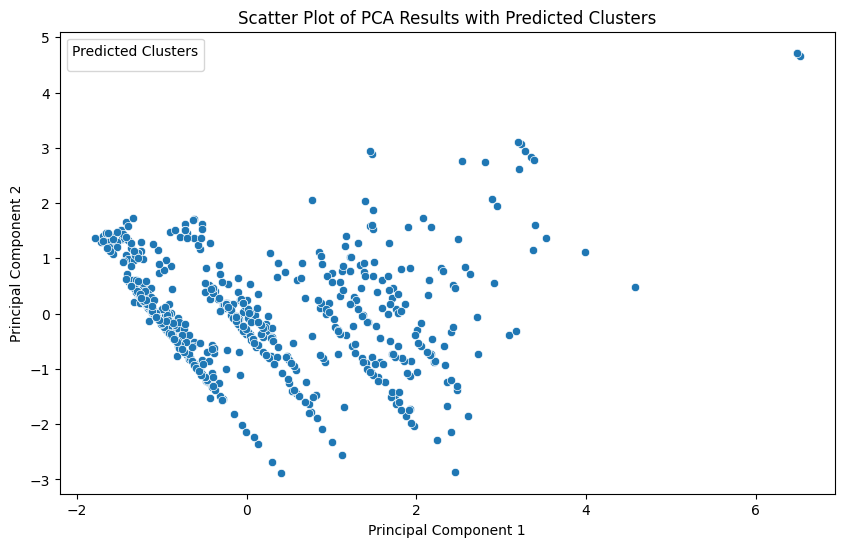

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, palette='viridis')
plt.title('Scatter Plot of PCA Results with Predicted Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Predicted Clusters')
plt.show()

**Comparison of Visualization: PCA vs. Best Model**

Using PCA for dimensionality reduction and subsequent clustering visualization has advantages over the original dataset. Here are the key points of comparison:

1. **Dimensionality Reduction:**
   - **Original Dataset:** The original dataset had [original_dimensions] dimensions.
   - **PCA Dataset:** The PCA dataset has been reduced to 3 dimensions.

2. **Visualization:**
   - **Original Dataset:** Visualizing clusters in the original dataset with more than 3 dimensions can be challenging. Typically, we can only visualize two or three dimensions at once.
   - **PCA Dataset:** PCA allows us to project the data onto a reduced dimensional space (in this case, 2D). We can now visualize the clusters in a 2D scatter plot, making it easier to interpret and compare.

3. **Cluster Separation:**
   - **Original Dataset:** Clusters may have been less clear in the original dataset due to the high dimensionality and potential overlap in feature space.
   - **PCA Dataset:** PCA aims to capture the most significant variance in the data. By plotting Principal Component 1 and 2, we can observe better separation between clusters.

4. **Interpretability:**
   - **Original Dataset:** Interpreting the relationship between features and clusters in high dimensions can be complex.
   - **PCA Dataset:** PCA simplifies the dataset, making it easier to interpret the relationships between clusters and principal components.

In summary, using PCA for dimensionality reduction and subsequent clustering visualization provides a more effective way to explore and understand the underlying structure of the data compared to the original dataset. The 2D scatter plot of PCA results provides clearer insights into the separation and relationships between clusters.


# Convert to HTML

In [101]:
# Insert a code cell to include to following line of command in each
# Colab notebook to access data files saved in Google Drive of your account
# Retrieve csv file from google drive by mapping the folder from google drive.
# Must be done each time session expires.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [103]:
# Copy the ipynb to the local working directory
# Replace 'A7_Messier_Mitch.ipynb' with your actual file name if it's different
!cp "/content/drive/MyDrive/A9_Messier_Mitch.ipynb" ./

# Create an HTML file from the ipynb
!jupyter nbconvert --to html "A9_Messier_Mitch.ipynb"

[NbConvertApp] Converting notebook A9_Messier_Mitch.ipynb to html
[NbConvertApp] Writing 972431 bytes to A9_Messier_Mitch.html
